In [32]:
import pandas as pd
import matplotlib.pyplot as plt


G_predict_set = pd.read_csv('/home/jbd3qn/Downloads/critical_temp_GCNN/model_10_10/test_predict.csv')
G_predict = G_predict_set.iloc[:,1].tolist()
G_true = G_predict_set.iloc[:,0].tolist()


CP_predict_set = pd.read_csv('/home/jbd3qn/Downloads/critical_temp_GCNN/dataset_editing/test_preds_temp _CHEMPROP.csv')
CP_predict = CP_predict_set.iloc[:,1].tolist()
CP_smiles = CP_predict_set.iloc[:,0].tolist()

In [42]:
len(CP_predict)
len(G_predict)

116

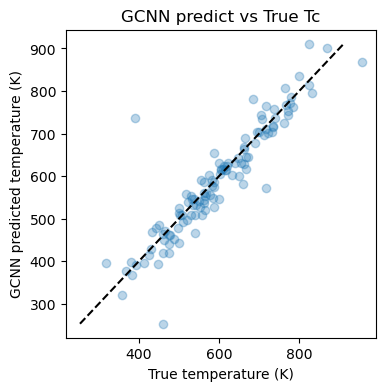

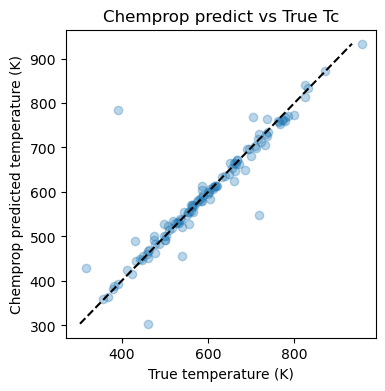

In [44]:
#predict vs true for GCNN and Chemprop
plt.figure(figsize=(4, 4), dpi=100)
plt.scatter(G_true, G_predict, alpha=0.3)
plt.plot([min(G_predict), max(G_predict)], [min(G_predict),max(G_predict)], color="k", ls="--")
plt.xlabel('True temperature (K)')
plt.ylabel('GCNN predicted temperature (K)')
plt.title('GCNN predict vs True Tc')
plt.show()

plt.figure(figsize=(4, 4), dpi=100)
plt.scatter(G_true, CP_predict , alpha=0.3)
plt.plot([min(CP_predict), max(CP_predict)], [min(CP_predict),max(CP_predict)], color="k", ls="--")
plt.xlabel('True temperature (K)')
plt.ylabel('Chemprop predicted temperature (K)')
plt.title('Chemprop predict vs True Tc')
plt.show()

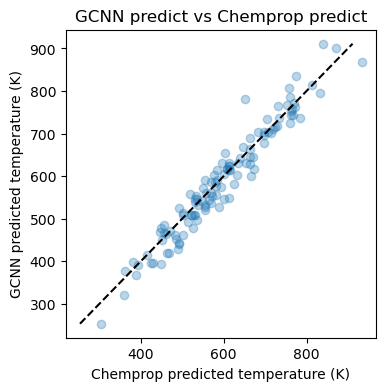

In [45]:
plt.figure(figsize=(4, 4), dpi=100)
plt.scatter(CP_predict, G_predict, alpha=0.3)
plt.plot([min(G_predict), max(G_predict)], [min(G_predict),max(G_predict)], color="k", ls="--")
plt.xlabel('Chemprop predicted temperature (K)')
plt.ylabel('GCNN predicted temperature (K)')
plt.title('GCNN predict vs Chemprop predict')
plt.show()


In [53]:
#how to get the error associated with each data point? 
#true abs erroe = abs(predicted - actual)
chemprop_error = []
gcnn_error = []
for index in range(0, len(G_true)):
    cp_error = (abs(CP_predict[index] - G_true[index])/G_true[index])*100
    g_error = (abs(G_predict[index] - G_true[index])/G_true[index])*100
    chemprop_error.append(cp_error)
    gcnn_error.append(g_error)



In [54]:
print(chemprop_error)
chemprop_smiles_error = list(zip(CP_smiles, chemprop_error))

chemprop_smiles_error = pd.DataFrame(chemprop_smiles_error)
chemprop_smiles_error.columns = ['SMILES', 'chemprop_error%']

chemprop_smiles_error.to_csv('/home/jbd3qn/Downloads/critical_temp_GCNN/dataset_editing/chemprop_smiles_error_percent.csv', index=False)


[3.542535124160363, 3.2942738107494733, 0.5367466638278559, 2.483356596816017, 1.2365919870659043, 0.38387312840600263, 0.6769674962485234, 0.4985722078448098, 0.8386100078522055, 0.15440022679780793, 0.27891688671519094, 0.2005996661911143, 0.5278231192814975, 0.16837242767919666, 1.5916687446353914, 0.2950625258350043, 0.4628965089406944, 0.19807503744393792, 0.5377961903860042, 0.4557736291028159, 1.2141969468246876, 0.6222959254388032, 2.201151657973374, 5.652851535403871, 1.259348334985596, 0.7550802515892105, 0.10145561177570482, 0.3578559994778163, 0.931865927657634, 8.92161364555224, 0.6477327307602998, 1.2542822422070987, 0.4706785864200021, 3.0857701856746393, 0.23970714616921596, 1.428875447399901, 0.3693183874205315, 0.7927697093116992, 100.58853246792287, 3.4355302542807657, 1.3158143154483646, 2.9102852444796783, 3.3450500458246832, 1.453707637416243, 1.830611137208565, 0.708686496700357, 0.7742771340946965, 1.9755112114012447, 5.019459569230398, 3.36849109980328, 2.23623

In [55]:
print(gcnn_error)
gcnn_smiles_error = list(zip(CP_smiles, gcnn_error))

gcnn_smiles_error = pd.DataFrame(gcnn_smiles_error)
gcnn_smiles_error.columns = ['SMILES', 'gcnn_error%']

gcnn_smiles_error.to_csv('/home/jbd3qn/Downloads/critical_temp_GCNN/dataset_editing/gcnn_smiles_error_percent.csv', index=False)

[0.2461702463676591, 4.276070000000004, 1.2247305475504358, 0.7643774069319709, 0.9092406235530058, 0.692979050279328, 0.7757561374795411, 3.5569520958083856, 0.1764527683233172, 3.558926389737326, 4.792370524852272, 4.344916967509028, 5.151276915373064, 3.6357293233082686, 7.967170029845418, 4.833713924916467, 4.810490092270456, 2.5663796992481216, 4.971245085190043, 7.799380445304946, 4.184880952380948, 1.842792302106019, 2.2945160103054794, 4.119458646616538, 3.85814134092674, 3.7174244640394454, 1.8724010731052971, 4.819044555833016, 0.973379667043797, 5.574723404255313, 1.9213528729922262, 1.2706350914962365, 2.817564182215367, 4.182458812060769, 1.1369868457656156, 2.5052354171760833, 6.226128394173696, 5.505196335078537, 88.42421645132403, 5.823935185185186, 2.9687565687642334, 11.580394093703708, 3.8371409028727723, 4.951552521471052, 2.0988888888888857, 0.398785500747394, 3.53146574154379, 7.965700483091798, 14.090839661214966, 1.6619000331016223, 0.9205060422960725, 2.8081922

In [52]:
print(chemprop_error)

[3.542535124160363, 3.2942738107494733, 0.5367466638278559, 2.483356596816017, 1.2365919870659043, 0.38387312840600263, 0.6769674962485234, 0.4985722078448098, 0.8386100078522055, 0.15440022679780793, 0.27891688671519094, 0.2005996661911143, 0.5278231192814975, 0.16837242767919666, 1.5916687446353914, 0.2950625258350043, 0.4628965089406944, 0.19807503744393792, 0.5377961903860042, 0.4557736291028159, 1.2141969468246876, 0.6222959254388032, 2.201151657973374, 5.652851535403871, 1.259348334985596, 0.7550802515892105, 0.10145561177570482, 0.3578559994778163, 0.931865927657634, 8.92161364555224, 0.6477327307602998, 1.2542822422070987, 0.4706785864200021, 3.0857701856746393, 0.23970714616921596, 1.428875447399901, 0.3693183874205315, 0.7927697093116992, 100.58853246792287, 3.4355302542807657, 1.3158143154483646, 2.9102852444796783, 3.3450500458246832, 1.453707637416243, 1.830611137208565, 0.708686496700357, 0.7742771340946965, 1.9755112114012447, 5.019459569230398, 3.36849109980328, 2.23623

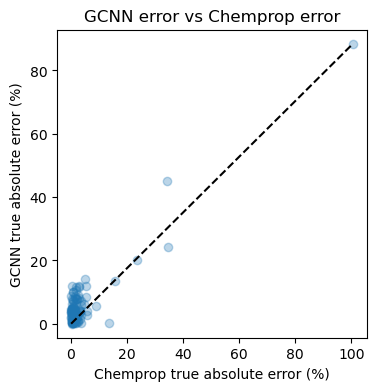

In [58]:
plt.figure(figsize=(4, 4), dpi=100)
plt.scatter(chemprop_error, gcnn_error, alpha=0.3)
plt.plot([min(chemprop_error), max(chemprop_error)], [min(gcnn_error),max(gcnn_error)], color="k", ls="--")
plt.xlabel('Chemprop true absolute error (%)')
plt.ylabel('GCNN true absolute error (%)')
plt.title('GCNN error vs Chemprop error')
plt.show()